# Running before

In [ ]:
%load_ext autoreload
%autoreload 2
from plot import *
import sys
sys.path.append("../lib")
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
from matplotlib.colors import LinearSegmentedColormap
import sys 
import numpy as np
import jax
import jax.numpy as jnp
import jax
# jax.config.update("jax_platform_name", "cpu")
import matplotlib.pyplot as plt
rgb_values = [
    [231, 98, 84],
    [239, 138, 71],
    [247, 170, 88],
    [255, 208, 111],
    [255, 230, 183],
    [170, 220, 224],
    [114, 188, 213],
    [82, 143, 173],
    [55, 103, 149],
    [30, 70, 110]
]
colors = [[x / 255 for x in rgb] for rgb in rgb_values]
rgb_values2 = [
    [231, 98, 84],
    [239, 138, 71],
    [247, 170, 88],
    [255, 208, 111],
    # [255, 230, 183],
    [170, 220, 224],
    [114, 188, 213],
    [82, 143, 173],
    [55, 103, 149],
    [30, 70, 110]
]
colors2 = [[x / 255 for x in rgb] for rgb in rgb_values2]
colors_line = [
    (55/255, 103/255, 149/255),    # #c7522a
    (114/255, 188/255, 213/255),  # #e5c185
    (247/255, 170/255, 88/255),  # #fbf2c4
    (231/255, 98/255, 84/255)     # #008585
]
colors_line2 = [
    (189/255, 60/255, 51/255),    # #c7522a
    (63/255, 96/255, 163/255),  # #e5c185
]
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
creamy_jet_rgb = [
    [15, 30, 120],
    [60, 110, 190],
    [160, 210, 220],
    [240, 240, 210],
    [245, 190, 120],
    [190, 90, 60]
]
colors = np.array(creamy_jet_rgb) / 255.0
cmap_bird_256 = LinearSegmentedColormap.from_list(
    "cmap_bird_256",
    colors,
    N=256
)
# params = {
#     'axes.labelsize': 24,
#     'font.size': 22,
#     'lines.linewidth': 1.5,
#     'legend.fontsize': 22,
#     'xtick.labelsize': 22,
#     'ytick.labelsize': 22,
#     'text.usetex': False,
#     'figure.figsize': [8, 6],
#     'axes.linewidth': 1.5
# }
# plt.rcParams.update(params)
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "stix",
    "text.usetex": False,
    "figure.figsize": (8, 6),
    "axes.linewidth": 2.0,
    "font.size": 20,
    "axes.labelsize": 24,
    "axes.titlesize": 20,
    "legend.fontsize": 20,
    "xtick.labelsize": 20,    # tick label
    "ytick.labelsize": 20,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 8,
    "ytick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.minor.size": 4,
    "xtick.major.width": 2.0,
    "ytick.major.width": 2.0,
    "xtick.minor.width": 1.5,
    "ytick.minor.width": 1.5,
    "axes.labelpad": 6,
    "lines.linewidth": 1.5,
})
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=10)
cmap256 = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap256_2 = LinearSegmentedColormap.from_list("custom_cmap", colors2, N=256)
from notion_client import Client
notion = Client(auth="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")
database_id = "1f8fc9067a748057a9ebf052fd25a8bd"
response = notion.databases.query(
    database_id=database_id,
    page_size=100
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from notion import get_Mock_lens_system_params_mul
from astropy.io import fits
from tqdm import tqdm
from update_single import *
from update_all import *
simu_obj = "all_sim_Mul"
simu_obj_use = "all_sim"
savefile     = "Theory_Mock"
idx_use            = 184
main_folder = f"{savefile}/{simu_obj}"
base_folder = f"{savefile}/{simu_obj}/{idx_use}"
file_path = "Theory_Mock/cusp_all_observable_multipole.fits"
with fits.open(file_path) as hdul:
    data = hdul[1].data
lens_params = get_Mock_lens_system_params_mul(data, idx_use, simu_obj)
halo_types   = ["CDM", "SIDM", "FDM"]
run_id = 0
iteration_folder = os.path.join(base_folder, f"{run_id}")
analyzer = HaloAnalyzer(
                name=lens_params["name"],
                obj=lens_params,
                savefile=iteration_folder,
                globalfile=base_folder ,
                IsMock=True
            )
analyzer.fix_parameter_mock()
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.01], wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
axes = [ax1, ax2, ax3]
im_main = None
thetaE  = lens_params["thetaE"]
nnn     = lens_params["nnn"]
bsz = analyzer.bsz_arc
print(bsz,nnn)
for idx, (ax, ht) in enumerate(zip(axes, halo_types)):
    params         = load_kappa_multi(f"{simu_obj_use}_{idx_use+1}", ht, thetaE,
                                      filename=iteration_folder, nnn=nnn,bsz=bsz)
    k_main         = get_main_plan_kappa(params['bsz'],
                                         filename_main=f"{base_folder}/{simu_obj_use}_{idx_use+1}_Global_alpha.npz", nnn=nnn)
    kappa_eff_sub  = params["kappa_multi"] - k_main
    vmin, vmax = -0.1, 0.1
    im_main = plot_kappa(ax, kappa_eff_sub,
                         params['mu'], params['bsz'], nnn,
                         vmin=vmin, vmax=vmax, text=ht)
    if idx != 0:
        ax.set_ylabel("")
        ax.set_yticklabels([])
cbar_ax = fig.add_axes([0.9, 0.12, 0.01, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im_main, cax=cbar_ax)
cbar.set_label(r"$\kappa_{\mathrm{eff, sub}}$")
plt.tight_layout(rect=[0, 0, 0.89, 1])
fig.savefig("Figures/kappa_eff_sub_comparison.png", dpi=300, bbox_inches="tight", format="png")
plt.show()

In [ ]:
import sys
sys.path.append("../lib")
from show_kappa import *
data_file = f'{analyzer.globalfile}/all_sim_185_Global_alpha.npz'
kappa_multi, yi1, yi2, mu_global, lambdat_global,_ = get_kappa(data_file, analyzer.bsz_arc, analyzer.nnn)


In [7]:
from Lensing_tool import mapping_triangles_vec
ys = np.array([(-0.052854503913067674),(0.202787870661723)])
from fit_position import *
thetaE = analyzer.thetaE
print(analyzer.thetaE)
bsz_arc = analyzer.bsz_arc
nnn = analyzer.obj["nnn"]
dsx_arc = bsz_arc / nnn
xi2, xi1 = make_c_coor(bsz_arc, nnn)
xroots = mapping_triangles_vec(ys, xi1, xi2,yi1, yi2, len(xi1))
print("Mapped points: ")
print(xroots)

0.6730897531736545
映射得到的点：
[[ 1.09635669e-04 -6.31975256e-04]
 [ 4.11067957e-02 -3.45055319e-01]
 [ 4.04911514e-01  7.35454620e-01]
 [-5.01028434e-01  5.46039036e-01]
 [-8.05818111e-02  7.76105608e-01]]


In [8]:
from MCMC import *
i = idx_use
bsz_arc = analyzer.bsz_arc
nnn = analyzer.obj["nnn"]
obj = lens_params["name"]
import json
import os
json_path = os.path.join("Theory_Mock", "all_sim_Mul", f"{idx_use}", f"{run_id}", f"{simu_obj_use}_{idx_use}_params.json")
with open(json_path, "r") as f:
    json_data = json.load(f)
for key in ["Sample_reff", "phi_sigma", "phi1_sigma", "phi2_sigma"]:
    if key in json_data:
        lens_params[key] = json_data[key]
lens_params.setdefault("phi_sigma", None)
lens_params.setdefault("phi1_sigma", None)
lens_params.setdefault("phi2_sigma", None)
object_lensing = analyzer.obj
print(object_lensing)
image_positions_relative_to_L = {
    "A": (object_lensing["x_imageA"], object_lensing["y_imageA"],
        object_lensing["delta_theta_FDM"], object_lensing["delta_theta_FDM"]),
    "B": (object_lensing["x_imageB"], object_lensing["y_imageB"],
        object_lensing["delta_theta_FDM"], object_lensing["delta_theta_FDM"]),
    "C": (object_lensing["x_imageC"], object_lensing["y_imageC"],
        object_lensing["delta_theta_FDM"], object_lensing["delta_theta_FDM"]),
    "D": (object_lensing["x_imageD"], object_lensing["y_imageD"],
        object_lensing["delta_theta_FDM"], object_lensing["delta_theta_FDM"]),
}
xi2, xi1 = make_c_coor(bsz_arc, nnn)

{'name': 'all_sim_Mul_185', 'zlens': 1.1471341372101314, 'zsource': 3.7039276830758627, 'phi': 70.62782931225141, 'phi_sigma': 0.48849598079167905, 'phi1': 35.46147388117965, 'phi1_sigma': 0.4652017261904779, 'phi2': 35.16635543107176, 'phi2_sigma': 0.5109770462093699, 'Rcusp': 0.4700521760530199, 'gamma_external': 0.12611198470537, 'phi_external': 208.28257926510975, 'phi_lens': 0, 'lambda_q': 1.237, 'q': 0.4116334843587034, 'thetaE': 0.5441307624685969, 'v_disp': 196.0603543003517, 'Sample_reff': 0.17789158024554136, 'delta_theta_FDM': Array(0.01007731, dtype=float64), 'nnn': 1500, 'x_imageA': -0.09013165886231689, 'y_imageA': 0.7764654652756231, 'x_imageB': 0.4084026075837293, 'y_imageB': 0.7399716156317369, 'x_imageC': -0.4943152570800818, 'y_imageC': 0.5518391447073385, 'x_imageD': 0.04203439769275202, 'y_imageD': -0.3467561903121995, 'source_xlocation': -0.052854503913067674, 'source_ylocation': 0.202787870661723, 'a3_over_a_signed': 0.006229201911572674, 'delta_phi_m3': -0.42302

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
# Assuming you have values for xi1, xi2, yi1, yi2, mu_global, lambdar_global, lambdat_global, etc.
cutd = 1.7
cut_c_p = 0.2
fig_combined, ax = plt.subplots(1, 2, figsize=(10, 6))
# First subplot
ax_ = ax[0]
lambdat_contour1 = ax_.contour(xi2, xi1, lambdat_global, levels=[0.0], colors='red', linewidths=2, alpha=0.9, linestyles='-')
ax_.set_aspect('equal')
ax_.set_xlabel("X (arcsec)")
ax_.set_ylabel("Y (arcsec)")
ax_.set_xlim(-cutd,cutd)
ax_.set_ylim(-cutd,cutd)
# Second subplot
ax_ = ax[1]
levels = np.logspace(np.log10(1), np.log10(6), 250)
norm = colors.Normalize(vmin=1, vmax=6)
lambdat_contour2 = ax_.contour(yi2, yi1, lambdat_global, levels=[0.0,10.0], colors='green', linewidths=2, alpha=0.9, linestyles='-')
# lambdat_contour2 =  ax_.contour(yi2, yi1, np.log10(np.abs(mu_global)), levels=levels, cmap='jet', linewidths=2, norm=norm)
ax_.set_aspect('equal')
ax_.set_xlabel("X (arcsec)")
# ax_.set_ylabel("Y (arcsec)")
ax_.set_xlim(-cutd*cut_c_p,cutd*cut_c_p)
ax_.set_ylim(-cutd*cut_c_p,cutd*cut_c_p)
# Create custom legend with only lines (no color blocks)
solid_line = mlines.Line2D([], [], color='red', linestyle='-', label='Tangential Critical')
dashed_line = mlines.Line2D([], [], color='red', linestyle='--', label='Radial Critical',alpha=0.4)
solid_line2 = mlines.Line2D([], [], color='green', linestyle='-', label='Tangential Caustics')
dashed_line2 = mlines.Line2D([], [], color='green', linestyle='--', label='Radial Caustics',alpha=0.4)
# Add legend to the figure
fig_combined.legend(handles=[solid_line, dashed_line, solid_line2, dashed_line2],
                    loc='upper center',  # Position the legend at the top
                    bbox_to_anchor=(0.5, 0.06),  # Positioning it below the plot
                    ncol=4,  # Number of columns in the legend
                    fontsize=16,  # Font size
                    frameon=False,  # Remove the frame around the legend
                    columnspacing=1.0,  # Adjust the spacing between columns
                    handletextpad=0.7)  # Adjust the spacing between the legend symbol and text
# find the sharpest point on the caustic
lambdat_contour2_paths = lambdat_contour2.allsegs[0]
caustic_points = []
for segment in lambdat_contour2_paths:
    caustic_points.append(segment)
ax[1].scatter(ys[1], ys[0], color='red', s=30, edgecolor='black', zorder=3, label="")
for i, (x, y) in enumerate(xroots):
    circle = plt.Circle((y, x), 0.03, color='black', fill=False, linewidth=1.5, zorder=4)
    ax[0].add_patch(circle)
    # ax[0].annotate(f"{i}", (y, x), fontsize=10, color='black', ha='center', va='center', fontweight='bold')
# Adjust layout and show plot
for label, (y, x, y_err, x_err) in image_positions_relative_to_L.items():
    ax[0].errorbar(
        x, y,
        xerr=x_err, yerr=y_err,
        fmt='o', capsize=2, elinewidth=1, markersize=4,
        color='red', label=f"Image {label}" if label == "A" else None
    )
    ax[0].text(x + 0.03, y + 0.03, label, fontsize=10, color='red')
ax[0].set_aspect('equal')
fig_combined.tight_layout()
plt.show()
# fig_combined.savefig("/Users/si-yuanhou/Library/Mobile Documents/com~apple~CloudDocs/Desktop/iCould_main/My_paper/Galaxy_substructure/fig/Critical_cuve_Caustics_cdm.pdf", format="pdf", bbox_inches="tight", dpi=300)

In [10]:
from plot import plot_fdm_with_xroots_and_observations
from update_single import HaloAnalyzer
import numpy as np
import os
simu_obj     = "all_sim_Mul"
simu_obj_use = "all_sim"
savefile     = "Theory_Mock"
idx_use      = 184
run_id       = 0
base_folder       = os.path.join(savefile, simu_obj, f"{idx_use}")
iteration_folder  = os.path.join(base_folder, f"{run_id}")
print(iteration_folder )
halo_types        = ["CDM", "SIDM", "FDM"]
obj     = lens_params
thetaE  = obj["thetaE"]
nnn     = obj["nnn"]
# analyzer = HaloAnalyzer(name=obj["name"], obj=obj, savefile=iteration_folder, globalfile=iteration_folder, IsMock=True)
def load_all_xroots_lists(simu_obj, sim_type, iteration_folder):
    x_all = []
    y_all = []
    weights_all = []
    file_name = f"{simu_obj}_{sim_type}_{idx_use}_xroots_muinfo_rcusp.npz"
    load_path = os.path.join(iteration_folder, file_name)
    print(load_path)
    if not os.path.exists(load_path):
        print(f"File does not exist: {load_path}, skipping. ")
        return x_all, y_all, weights_all
    data = np.load(load_path, allow_pickle=True)
    xroots_list = data['xroots_list']
    weights_list = data['weights']
    for xroots, weight in zip(xroots_list, weights_list):
        for pt in xroots:
            x_all.append(pt[1])       # x
            y_all.append(pt[0])       # y
            weights_all.append(weight)
    return x_all, y_all, weights_all


Theory_Mock/all_sim_Mul/184/0


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle, ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def plot_fdm_with_xroots_and_observations_ax(
    analyzer,
    i,
    x_all,
    y_all,
    weights,
    sim_type,
    plot_kappa_func,
    ax=None,
    x_flip=True,
    zoom_size=0.05,
    inset_labels=["A", "B", "C"],
    inset_size="42%",
    save_path=None,
    savefile="Simulation",
    vmin=-0.02,
    vmax=0.02
):
    object_lensing = analyzer.obj
    image_positions_relative_to_L = {
        "A": (object_lensing["x_imageA"], object_lensing["y_imageA"],
              object_lensing["delta_theta_FDM"], object_lensing["delta_theta_FDM"]),
        "B": (object_lensing["x_imageB"], object_lensing["y_imageB"],
              object_lensing["delta_theta_FDM"], object_lensing["delta_theta_FDM"]),
        "C": (object_lensing["x_imageC"], object_lensing["y_imageC"],
              object_lensing["delta_theta_FDM"], object_lensing["delta_theta_FDM"]),
        "D": (object_lensing["x_imageD"], object_lensing["y_imageD"],
              object_lensing["delta_theta_FDM"], object_lensing["delta_theta_FDM"]),
    }
    thetaE = object_lensing["thetaE"]
    nnn = object_lensing["nnn"]
    simu_obj = object_lensing["name"]
    base_folder = analyzer.savefile
    global_file = analyzer.globalfile
    bsz = analyzer.bsz_arc
    simu_obj_use = "all_sim"
    sim_obj_with_idx = f"{simu_obj_use}_{i+1}"
    params = load_kappa_multi(
        sim_obj_with_idx, sim_type, thetaE,
        filename=base_folder, nnn=nnn, bsz=bsz
    )
    k_main = get_main_plan_kappa(
        params['bsz'],
        filename_main=os.path.join(global_file, f"{sim_obj_with_idx}_Global_alpha.npz"),
        nnn=nnn
    )
    kappa_fdm = params["kappa_multi"] - k_main
    x_all = np.array(x_all)
    y_all = np.array(y_all)
    weights = np.array(weights)
    obs_points = {
        label: ((x if x_flip else x), y, x_err, y_err)
        for label, (y, x, y_err, x_err) in image_positions_relative_to_L.items()
    }
    created_fig = False
    if ax is None:
        fig = plt.figure(figsize=(8, 8))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.03], wspace=0.1)
        ax = fig.add_subplot(gs[0, 0])
        created_fig = True
    else:
        fig = ax.figure
    bsz = params['bsz']
    nnn = params['mu'].shape[0]
    im_fdm = plot_kappa_func(
        ax, kappa_fdm, params['mu'], bsz, nnn,
        vmin=vmin, vmax=vmax, text=f"{sim_type} (Lens plane)"
    )
    ax.scatter(
        x_all, y_all, s=5, c=weights,
        cmap='viridis', alpha=0.8, label="xroots (weighted)"
    )
    for label, (x, y, xerr, yerr) in obs_points.items():
        ax.text(x + 0.03, y + 0.03, label, color='black')
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_xlabel("")
    inset_loc_map = {
        "A": 'upper left',
        "B": 'upper right',
        "C": 'lower right'
    }
    anchor_map = {
        'upper left':  (1.0, 0.0),
        'upper right': (0.0, 0.0),
        'lower right': (0.0, 1.0),
        'lower left':  (1.0, 1.0),
    }
    for label in inset_labels:
        if label not in obs_points:
            continue
        x0, y0, xerr, yerr = obs_points[label]
        inset_ax = inset_axes(
            ax,
            width=inset_size, height=inset_size,
            loc=inset_loc_map[label],
            borderpad=0
        )
        plot_kappa_func(
            inset_ax, kappa_fdm, params['mu'], bsz, nnn,
            vmin=vmin, vmax=vmax, text=None
        )
        mask = (np.abs(x_all - x0) < zoom_size) & (np.abs(y_all - y0) < zoom_size)
        inset_ax.scatter(
            x_all[mask], y_all[mask],
            s=6, c=weights[mask], cmap='magma', alpha=0.8
        )
        inset_ax.text(x0 + 0.01, y0 + 0.01, label, color='black')
        inset_ax.set_xlim(x0 - zoom_size, x0 + zoom_size)
        inset_ax.set_ylim(y0 - zoom_size, y0 + zoom_size)
        inset_ax.set_aspect('equal')
        inset_ax.set_xticks([])
        inset_ax.set_yticks([])
        inset_ax.tick_params(
            axis='both',
            length=0,
            labelbottom=False,
            labeltop=False,
            labelleft=False,
            labelright=False
        )
        inset_ax.set_ylabel("")
        inset_ax.set_xlabel("")
 
        rect = Rectangle(
            (x0 - zoom_size, y0 - zoom_size),
            2 * zoom_size,
            2 * zoom_size,
            linewidth=0.9,
            edgecolor='black',
            facecolor='none',
            linestyle='-'
        )
        ax.add_patch(rect)
        anchor = anchor_map[inset_loc_map[label]]
        con = ConnectionPatch(
            xyA=(x0, y0), coordsA=ax.transData,
            xyB=anchor,   coordsB=inset_ax.transAxes,
            linewidth=0.9,
            # color='tab:blue'
        )
        fig.add_artist(con)
    # ============================
    # ============================
    if sim_type == "CDM":
        arcsec_1 = analyzer.arcsec_1
        scalebar_length = 0.5
        scale_pc = scalebar_length * arcsec_1 * 1e3
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        dx = x_max - x_min
        dy = y_max - y_min
        text_x = x_min + 0.08 * dx
        text_y = y_min + 0.1 * dy
        bar_y = text_y + 0.06 * dy
        bar_x0 = text_x
        bar_x1 = bar_x0 + scalebar_length
        ax.plot([bar_x0, bar_x1], [bar_y, bar_y],
                color='k', lw=3, zorder=5)
        ax.text((bar_x0 + bar_x1) / 2,
                bar_y + 0.03 * dy,
                f'{scale_pc:.0f} kpc/h',
                fontsize=24, color='k',
                ha='center', va='bottom', zorder=5)
    if created_fig:
        cbar_ax = fig.add_subplot(gs[0, 1])
        cbar = plt.colorbar(im_fdm, cax=cbar_ax)
        cbar.set_label(r"$\kappa_{\mathrm{eff,sub}}$")
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300)
        plt.show()
    return im_fdm

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
def Get_kappa_Map_list(analyzer, index, vscale, sim_types,name = "type"):
    n = len(sim_types)
    
    fig = plt.figure(figsize=(6 * n + 1, 6))
    gs = gridspec.GridSpec(1, n + 1, width_ratios=[1]*n + [0.03], wspace=0.1)
    
    for i, sim_type in enumerate(sim_types):
        ax = fig.add_subplot(gs[0, i])
        x_all, y_all, weights = load_all_xroots_lists(simu_obj, sim_type, iteration_folder)
        im = plot_fdm_with_xroots_and_observations_ax(
            analyzer,
            index,
            x_all, y_all,
            weights,
            sim_type,
            plot_kappa_func=plot_kappa,
            ax=ax,
            x_flip=True,
            zoom_size=0.05,
            inset_labels=["A", "B", "C"],
            inset_size="25%",
            vmin=-vscale,
            vmax=vscale,
            savefile="Test_Data"
        )
        if i > 0 or sim_type == "FDM":
            ax.set_yticklabels([])
            ax.set_ylabel("")
    cbar_ax = fig.add_subplot(gs[0, n])
    cbar = plt.colorbar(im, cax=cbar_ax, orientation='vertical')
    cbar.set_label(r"$\kappa_{\mathrm{eff,sub}}$")
    plt.savefig(f"kappa_{name}.png", dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()


In [13]:
from plot import plot_Caustics_list
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
def Get_Caustic_Map_list_all(analyzer, idx_use):
    sim_types = ["CDM", "SIDM", "FDM"]
    obj = analyzer.obj["name"]
    
    fig = plt.figure(figsize=(20, 6))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.03], wspace=0.1)
    
    for i, sim_type in enumerate(sim_types):
        simu_obj = "all_sim_Mul"
        base_folder = os.path.join("Theory_Mock", simu_obj, str(idx_use))
        iteration_folder = os.path.join(base_folder, str(run_id))
        npz_path =  os.path.join(iteration_folder, f"{simu_obj}_{sim_type}_{idx_use}_opt_result.npz")
        if not os.path.exists(npz_path):
            continue
        data = np.load(npz_path, allow_pickle=True)
        mu_global = data["mu_global"]
        y_opt = data["ys_final"]
        xi1 = data["xi1"]
        xi2 = data["xi2"]
        yi1 = data["yi1"]
        yi2 = data["yi2"]
        chain_path = os.path.join(iteration_folder, f"{simu_obj}_{sim_type}_{idx_use}_chain_combined.npz")
        selected_points = rebin_mcmc_points_within_nsigma_jax(chain_path, sigma_level=5)
        filtered_samples = selected_points[:, :2]
        chi2 = selected_points[:, 2]
        ax = fig.add_subplot(gs[0, i])
        im = plot_Caustics_list(
            ax, yi2, yi1, mu_global,
            filtered_samples[:, 1], filtered_samples[:, 0],
            analyzer.arcsec_s,  text=f"{sim_type} (Source plane)",
            numcaustic=10, inset_size="30%", zoom_size=0.01,
            chi2_values=chi2,vmin = 0.5,vmax = 2.5
        )
        
        if i > 0:
            ax.set_yticklabels([])
            ax.set_ylabel("")
    cbar_ax = fig.add_subplot(gs[0, 3])
    cbar = plt.colorbar(im, cax=cbar_ax, orientation='vertical')
    cbar.set_label(r'$\log(|\mu|)$')
    plt.savefig("Caustic.png",dpi=300)
    plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.transforms import blended_transform_factory
import os
def plot_caustic_focus(ax_, yi2, yi1, mu_global, ys1, ys2, arcsec_1,
                       yoff=False, xoff=False, ifscale=False, text=None,
                       numcaustic=2,
                       chi2_values=None, scatter_cmap='magma',
                       vmin=0.5, vmax=4.5,
                       focus_region=None):
    cutd = 8
    cut_c_p = 0.06
    # =========================
    # =========================
    ax_.set_facecolor('white')
    ax_.set_xlabel("X (arcsec)")
    ax_.set_ylabel("Y (arcsec)")
    if focus_region is not None:
        x1, x2, y1, y2 = focus_region
        ax_.set_xlim(x1, x2)
        ax_.set_ylim(y1, y2)
    else:
        ax_.set_xlim(-cutd * cut_c_p, cutd * cut_c_p)
        ax_.set_ylim(-cutd * cut_c_p, cutd * cut_c_p)
    # &&&!!!(2025-12-05 13:20)
    mu = np.array(mu_global, dtype=float)
    detA = np.full_like(mu, np.nan, dtype=float)
    finite = np.isfinite(mu) & (mu != 0)
    detA[finite] = 1.0 / mu[finite]
    det_min = np.nanmin(detA)
    det_max = np.nanmax(detA)
    if (det_min < 0.0) and (det_max > 0.0):
        contour_obj = ax_.contour(
            yi2, yi1, detA,
            levels=[0.0],
            colors='black',
            linewidths=2.0
        )
    else:
        mu_abs = np.abs(mu[np.isfinite(mu)])
        if mu_abs.size == 0:
            contour_obj = None
        else:
            mu_thr = np.nanpercentile(mu_abs, 99.7)
            contour_obj = ax_.contour(
                yi2, yi1, np.abs(mu),
                levels=[mu_thr],
                colors='black',
                linewidths=2.0
            )
    ax_.set_aspect('equal')
    # &&&!!!(2025-12-05 14:00)
    if text is not None:
        ax_.text(0.98, 0.98, text,
                fontsize=20, color='black',
                transform=ax_.transAxes,
                ha='right', va='top',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=2.0))
    if ifscale:
        # &&&!!!(2025-12-05 13:55)
        x1_, x2_ = ax_.get_xlim()
        xrange = x2_ - x1_
        scalebar_length = 0.1 * xrange
        scale_pc = scalebar_length * arcsec_1 * 1e6
        frac_x1 = 0.93
        frac_y  = 0.8
        dx_axes = scalebar_length / xrange
        x_end_axes = frac_x1
        x0_axes    = frac_x1 - dx_axes
        ax_.plot([x0_axes, x_end_axes], [frac_y, frac_y],
                transform=ax_.transAxes, color='black', lw=2, solid_capstyle='butt')
        ax_.text(0.5 * (x0_axes + x_end_axes)-0.01, frac_y - 0.15,
                f"{scale_pc:.1f} pc/h",
                transform=ax_.transAxes, color='black',
                ha='center', va='bottom', fontsize=15)
    return contour_obj

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Rectangle, ConnectionPatch
def Get_Caustic_Map_list_combined(analyzer, idx_use, focus_regions=None):
    """
    Top row: CDM / SIDM / FDM global caustic + inset + scale bar
    Bottom row: zoomed focus region + Rcusp scatter
    Right side: upper log(|mu|) colorbar; lower shorter Rcusp colorbar
    """
    sim_types = ["CDM", "SIDM", "FDM"]
    simu_obj = "all_sim_Mul"
    fig = plt.figure(figsize=(19, 19))
    outer = gridspec.GridSpec(
        1, 4,
        width_ratios=[1.0, 1.0, 1.0, 0.08],
        wspace=0.25
    )
    im = None
    sc = None
    ax_top_ref = None
    ax_tops, ax_bots = [], []
    def get_region(sim_type):
        if focus_regions is None:
            return None
        if isinstance(focus_regions, dict):
            return focus_regions.get(sim_type, None)
        return None
    for i, sim_type in enumerate(sim_types):
        base_folder = os.path.join("Theory_Mock", simu_obj, str(idx_use))
        iteration_folder = os.path.join(base_folder, str(run_id))
        npz_path = os.path.join(
            iteration_folder,
            f"{simu_obj}_{sim_type}_{idx_use}_opt_result.npz"
        )
        if not os.path.exists(npz_path):
            print(f"[WARN] caustic npz not found: {npz_path}")
            continue
        data = np.load(npz_path, allow_pickle=True)
        mu_global = data["mu_global"]
        yi1 = data["yi1"]
        yi2 = data["yi2"]
        posterior_path = os.path.join(
            analyzer.savefile,
            f"posterior_sourceplane_{sim_type}.npz"
        )
        if not os.path.exists(posterior_path):
            print(f"[WARN] posterior not found: {posterior_path}")
            continue
        posterior = np.load(posterior_path, allow_pickle=True)
        x_src = posterior["x_src"]
        y_src = posterior["y_src"]
        Rcusp = posterior["Rcusp"]
        chain_path = os.path.join(
            iteration_folder,
            f"{simu_obj}_{sim_type}_{idx_use}_chain_combined.npz"
        )
        selected_points = rebin_mcmc_points_within_nsigma_jax(
            chain_path, sigma_level=5
        )
        filtered_samples = selected_points[:, :2]
        chi2 = selected_points[:, 2]
        col_gs = gridspec.GridSpecFromSubplotSpec(
            2, 1,
            subplot_spec=outer[i],
            height_ratios=[1.0, 1.0],
            hspace=0.02
        )
        # --------------------------------------------------
        # --------------------------------------------------
        if ax_top_ref is None:
            ax_top = fig.add_subplot(col_gs[0])
            ax_top_ref = ax_top
        else:
            ax_top = fig.add_subplot(
                col_gs[0],
                sharex=ax_top_ref,
                sharey=ax_top_ref
            )
        im = plot_Caustics_list(
            ax_top,
            yi2, yi1, mu_global,
            filtered_samples[:, 1],  # ys1
            filtered_samples[:, 0],  # ys2
            analyzer.arcsec_s,
            text=f"{sim_type} (Source plane)",
            numcaustic=1000,
            inset_size="30%",
            zoom_size=0.01,
            chi2_values=chi2,
            vmin=0.5,
            vmax=3.5
        )
        if i > 0:
            ax_top.tick_params(labelleft=False)
            ax_top.set_ylabel("")
        region = get_region(sim_type)
        if region is not None:
            x_min, x_max, y_min, y_max = region
            rect = Rectangle(
                (x_min, y_min),
                x_max - x_min,
                y_max - y_min,
                linewidth=1.5,
                edgecolor='tab:blue',
                facecolor='none',
                zorder=8
            )
            ax_top.add_patch(rect)
        # --------------------------------------------------
        # --------------------------------------------------
        ax_bot = fig.add_subplot(col_gs[1])
        plot_caustic_focus(
            ax_bot,
            yi2, yi1, mu_global,
            None, None,
            analyzer.arcsec_1,
            ifscale=False,
            text=None,
            focus_region=region
        )
        order = np.argsort(Rcusp)
        x_src_ord = x_src[order]
        y_src_ord = y_src[order]
        Rcusp_ord = Rcusp[order]
        sc = ax_bot.scatter(
            x_src_ord,
            y_src_ord,
            c=Rcusp_ord,
            cmap='RdYlBu_r',
            vmin=0.0,
            vmax=0.5,
            s=8,
            edgecolors='none'
        )
        ax_bot.set_xlabel("X (arcsec)")
        if i == 0:
            ax_bot.set_ylabel("Y (arcsec)")
        else:
            ax_bot.tick_params(labelleft=False)
            ax_bot.set_ylabel("")
        ax_bot.set_aspect('equal')
        if region is not None:
            x_min, x_max, y_min, y_max = region
            cx = 0.5 * (x_min + x_max)
            cy = 0.5 * (y_min + y_max)
            con = ConnectionPatch(
                xyA=(cx, cy), coordsA=ax_top.transData,
                xyB=(0.5, 1.0), coordsB=ax_bot.transAxes,
                color='tab:blue',
                lw=1.2
            )
            fig.add_artist(con)
        ax_tops.append(ax_top)
        ax_bots.append(ax_bot)
    # =========================================================
    # =========================================================
    fig.canvas.draw()
    target_gap = 0.04
    for ax_top, ax_bot in zip(ax_tops, ax_bots):
        top_pos = ax_top.get_position()
        bot_pos = ax_bot.get_position()
        current_gap = top_pos.y0 - bot_pos.y1
        shift = current_gap - target_gap
        if shift > 0:
            new_y0 = bot_pos.y0 + shift
        else:
            new_y0 = bot_pos.y0
        new_bot = [top_pos.x0, new_y0, top_pos.width, bot_pos.height]
        ax_bot.set_position(new_bot)
    # ------------------------------------------------------
    # ------------------------------------------------------
    fig.canvas.draw()
    pos_top_right = ax_tops[-1].get_position()
    pos_bot_right = ax_bots[-1].get_position()
    cb_x0    = pos_top_right.x1 + 0.03
    cb_width = 0.02
    cb1_y0 = pos_top_right.y0
    cb1_h  = pos_top_right.height
    cax1 = fig.add_axes([cb_x0, cb1_y0, cb_width, cb1_h])
    cb1  = fig.colorbar(im, cax=cax1, orientation='vertical')
    cb1.set_label(r'$\log(|\mu|)$')
    cb2_h  = pos_bot_right.height * 0.6
    cb2_y0 = pos_bot_right.y0 + (pos_bot_right.height - cb2_h) * 0.5
    cax2 = fig.add_axes([cb_x0, cb2_y0, cb_width, cb2_h])
    cb2  = fig.colorbar(sc, cax=cax2, orientation='vertical')
    cb2.set_label(r"$R_{\rm cusp}$")
    cb2.set_ticks([0.0, 0.25, 0.5])
    plt.show()

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle, ConnectionPatch
from matplotlib.ticker import FormatStrFormatter
def Get_All_Maps_3rows(analyzer, idx_use, vscale, focus_regions=None):
    """
    Row 0: kappa_eff,sub (CDM / SIDM / FDM)
    Row 1: wide caustic + inset
    Row 2: zoomed caustic + Rcusp scatter
    Right: three colourbars (κ_eff,sub / log|μ| / R_cusp) aligned along x
    """
    sim_types = ["CDM", "SIDM", "FDM"]
    simu_obj = "all_sim_Mul"
    import matplotlib as mpl
    mpl.rcParams.update({
        "font.size": 24,
        "axes.titlesize": 24,
        "axes.labelsize": 24,
        "xtick.labelsize": 24,
        "ytick.labelsize": 24,
        "legend.fontsize": 24,
        "figure.titlesize": 24,
    })
    fig = plt.figure(figsize=(20, 20))
    outer = gridspec.GridSpec(
        3, 4,
        width_ratios=[1.0, 1.0, 1.0, 0.08],
        height_ratios=[1.0, 1.0, 1.0],
        wspace=0.15,
        hspace=0.08,
    )
    # ---------- Row 0: kappa maps ----------
    im_kappa = None
    ax_kappa_list = []
    for i, sim_type in enumerate(sim_types):
        ax_kappa = fig.add_subplot(outer[0, i])
        ax_kappa_list.append(ax_kappa)
        base_folder = os.path.join("Theory_Mock", simu_obj, str(idx_use))
        iteration_folder = os.path.join(base_folder, str(run_id))
        x_all, y_all, weights = load_all_xroots_lists(
            simu_obj, sim_type, iteration_folder
        )
        im_kappa = plot_fdm_with_xroots_and_observations_ax(
            analyzer,
            idx_use,
            x_all,
            y_all,
            weights,
            sim_type,
            plot_kappa_func=plot_kappa,
            ax=ax_kappa,
            x_flip=True,
            zoom_size=0.05,
            inset_labels=["A", "B", "C"],
            inset_size="25%",
            vmin=-vscale,
            vmax=vscale,
            savefile="Test_Data",
        )
        ax_kappa.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax_kappa.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if i > 0:
            ax_kappa.set_yticklabels([])
            ax_kappa.set_ylabel("")
    # panel_labels = ["a", "b", "c"]
    # for ax, lab in zip(ax_kappa_list, panel_labels):
    #     ax.text(
    #         0.02, 1.02, lab,
    #         transform=ax.transAxes,
    #         fontsize=26,
    #         fontweight="bold",
    #         ha="left",
    #         va="bottom"
    #     )
    # ---------- Row 1 & 2: Caustic + Rcusp ----------
    im_mu = None
    sc = None
    ax_top_ref = None
    ax_tops, ax_bots = [], []
    def get_region(sim_type_):
        if focus_regions is None:
            return None
        if isinstance(focus_regions, dict):
            return focus_regions.get(sim_type_, None)
        return None
    for i, sim_type in enumerate(sim_types):
        base_folder = os.path.join("Theory_Mock", simu_obj, str(idx_use))
        iteration_folder = os.path.join(base_folder, str(run_id))
        # --- caustic npz ---
        npz_path = os.path.join(
            iteration_folder,
            f"{simu_obj}_{sim_type}_{idx_use}_opt_result.npz",
        )
        if not os.path.exists(npz_path):
            print(f"[WARN] caustic npz not found: {npz_path}")
            continue
        data = np.load(npz_path, allow_pickle=True)
        mu_global = data["mu_global"]
        yi1 = data["yi1"]
        yi2 = data["yi2"]
        # --- posterior ---
        posterior_path = os.path.join(
            analyzer.savefile,
            f"posterior_sourceplane_{sim_type}.npz",
        )
        if not os.path.exists(posterior_path):
            print(f"[WARN] posterior not found: {posterior_path}")
            continue
        posterior = np.load(posterior_path, allow_pickle=True)
        x_src = posterior["x_src"]
        y_src = posterior["y_src"]
        Rcusp = posterior["Rcusp"]
        chain_path = os.path.join(
            iteration_folder,
            f"{simu_obj}_{sim_type}_{idx_use}_chain_combined.npz",
        )
        selected_points = rebin_mcmc_points_within_nsigma_jax(
            chain_path, sigma_level=5
        )
        filtered_samples = selected_points[:, :2]
        chi2 = selected_points[:, 2]
        if ax_top_ref is None:
            ax_top = fig.add_subplot(outer[1, i])
            ax_top_ref = ax_top
        else:
            ax_top = fig.add_subplot(
                outer[1, i],
                sharex=ax_top_ref,
                sharey=ax_top_ref,
            )
        ax_top.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax_top.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        im_mu = plot_Caustics_list(
            ax_top,
            yi2,
            yi1,
            mu_global,
            filtered_samples[:, 1],  # ys1
            filtered_samples[:, 0],  # ys2
            analyzer.arcsec_s,
            text=f"{sim_type} (Source plane)",
            numcaustic=1000,
            inset_size="30%",
            zoom_size=0.01,
            chi2_values=chi2,
            vmin=0.5,
            vmax=2.5
        )
        if i > 0:
            ax_top.tick_params(labelleft=False)
            ax_top.set_ylabel("")
        region = get_region(sim_type)
        if region is not None:
            x_min, x_max, y_min, y_max = region
            rect = Rectangle(
                (x_min, y_min),
                x_max - x_min,
                y_max - y_min,
                linewidth=1.5,
                edgecolor="lightcoral",
                facecolor="none",
                zorder=8,
            )
            ax_top.add_patch(rect)
        ax_bot = fig.add_subplot(outer[2, i])
        plot_caustic_focus(
            ax_bot,
            yi2,
            yi1,
            mu_global,
            None,
            None,
            analyzer.arcsec_1,
            ifscale=False,
            text=None,
            focus_region=region,
        )
        order = np.argsort(Rcusp)
        x_src_ord = x_src[order]
        y_src_ord = y_src[order]
        Rcusp_ord = Rcusp[order]
        sc = ax_bot.scatter(
            x_src_ord,
            y_src_ord,
            c=Rcusp_ord,
            cmap='rainbow',
            vmin=0.0,
            vmax=0.5,
            s=8,
            edgecolors="none",
        )
        ax_bot.set_xlabel("X (arcsec)")
        if i == 0:
            ax_bot.set_ylabel("Y (arcsec)")
        else:
            ax_bot.tick_params(labelleft=False)
            ax_bot.set_ylabel("")
        ax_bot.set_aspect("equal")
        ax_bot.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if region is not None:
            x_min, x_max, y_min, y_max = region
            cx = 0.5 * (x_min + x_max)
            cy = 0.5 * (y_min + y_max)
            con = ConnectionPatch(
                xyA=(cx, cy),
                coordsA=ax_top.transData,
                xyB=(0.5, 1.0),
                coordsB=ax_bot.transAxes,
                color="lightcoral",
                lw=1.2,
            )
            fig.add_artist(con)
        ax_tops.append(ax_top)
        ax_bots.append(ax_bot)
    fig.canvas.draw()
    target_gap = 0.035
    for ax_top, ax_bot in zip(ax_tops, ax_bots):
        top_pos = ax_top.get_position()
        bot_pos = ax_bot.get_position()
        current_gap = top_pos.y0 - bot_pos.y1
        shift = current_gap - target_gap
        if shift > 0:
            new_y0 = bot_pos.y0 + shift
        else:
            new_y0 = bot_pos.y0
        new_bot = [top_pos.x0, new_y0, top_pos.width, bot_pos.height]
        ax_bot.set_position(new_bot)
    fig.canvas.draw()
    ref_pos = ax_kappa_list[0].get_position()
    left0 = ref_pos.x0
    width0 = ref_pos.width
    for ax in (ax_kappa_list[0], ax_tops[0], ax_bots[0]):
        pos = ax.get_position()
        ax.set_position([left0, pos.y0, width0, pos.height])
        ax.set_ylabel("Y (arcsec)")
        ax.yaxis.get_label().set_fontsize(24)
        ax.yaxis.set_label_coords(-0.3, 0.5)
    fig.canvas.draw()
    fig.canvas.draw()
    pos_kappa_right = ax_kappa_list[-1].get_position()
    pos_top_right = ax_tops[-1].get_position()
    pos_bot_right = ax_bots[-1].get_position()
    cb_x0 = pos_top_right.x1 + 0.03
    cb_width = 0.015
    cb_label_fs = 24
    cb_tick_fs  = 24
    cax_kappa = fig.add_axes(
        [cb_x0, pos_kappa_right.y0, cb_width, pos_kappa_right.height]
    )
    cb_kappa = fig.colorbar(im_kappa, cax=cax_kappa, orientation="vertical")
    cb_kappa.set_label(r"$\kappa_{\mathrm{eff,sub}}$", fontsize=cb_label_fs)
    cb_kappa.ax.tick_params(labelsize=cb_tick_fs)
    cb_kappa.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    cax_mu = fig.add_axes(
        [cb_x0, pos_top_right.y0, cb_width, pos_top_right.height]
    )
    cb_mu = fig.colorbar(im_mu, cax=cax_mu, orientation="vertical")
    cb_mu.set_label(r"$\log(|\mu|)$", fontsize=cb_label_fs)
    cb_mu.ax.tick_params(labelsize=cb_tick_fs)
    cb_mu.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    cb2_h = pos_bot_right.height 
    cb2_y0 = pos_bot_right.y0 + (pos_bot_right.height - cb2_h) * 0.5
    cax_rcusp = fig.add_axes([cb_x0, cb2_y0, cb_width, cb2_h])
    cb_rcusp = fig.colorbar(sc, cax=cax_rcusp, orientation="vertical")
    cb_rcusp.set_label(r"$R_{\rm cusp}$", fontsize=cb_label_fs)
    cb_rcusp.set_ticks([0.0, 0.25, 0.5])
    cb_rcusp.ax.tick_params(labelsize=cb_tick_fs)
    cb_rcusp.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig.savefig("AllMaps_3rows.png", dpi=150, bbox_inches="tight")
    plt.show()

# Overall plot

Theory_Mock/all_sim_Mul/184/0/all_sim_Mul_CDM_184_xroots_muinfo_rcusp.npz


Theory_Mock/all_sim_Mul/184/0/all_sim_Mul_SIDM_184_xroots_muinfo_rcusp.npz
Theory_Mock/all_sim_Mul/184/0/all_sim_Mul_FDM_184_xroots_muinfo_rcusp.npz


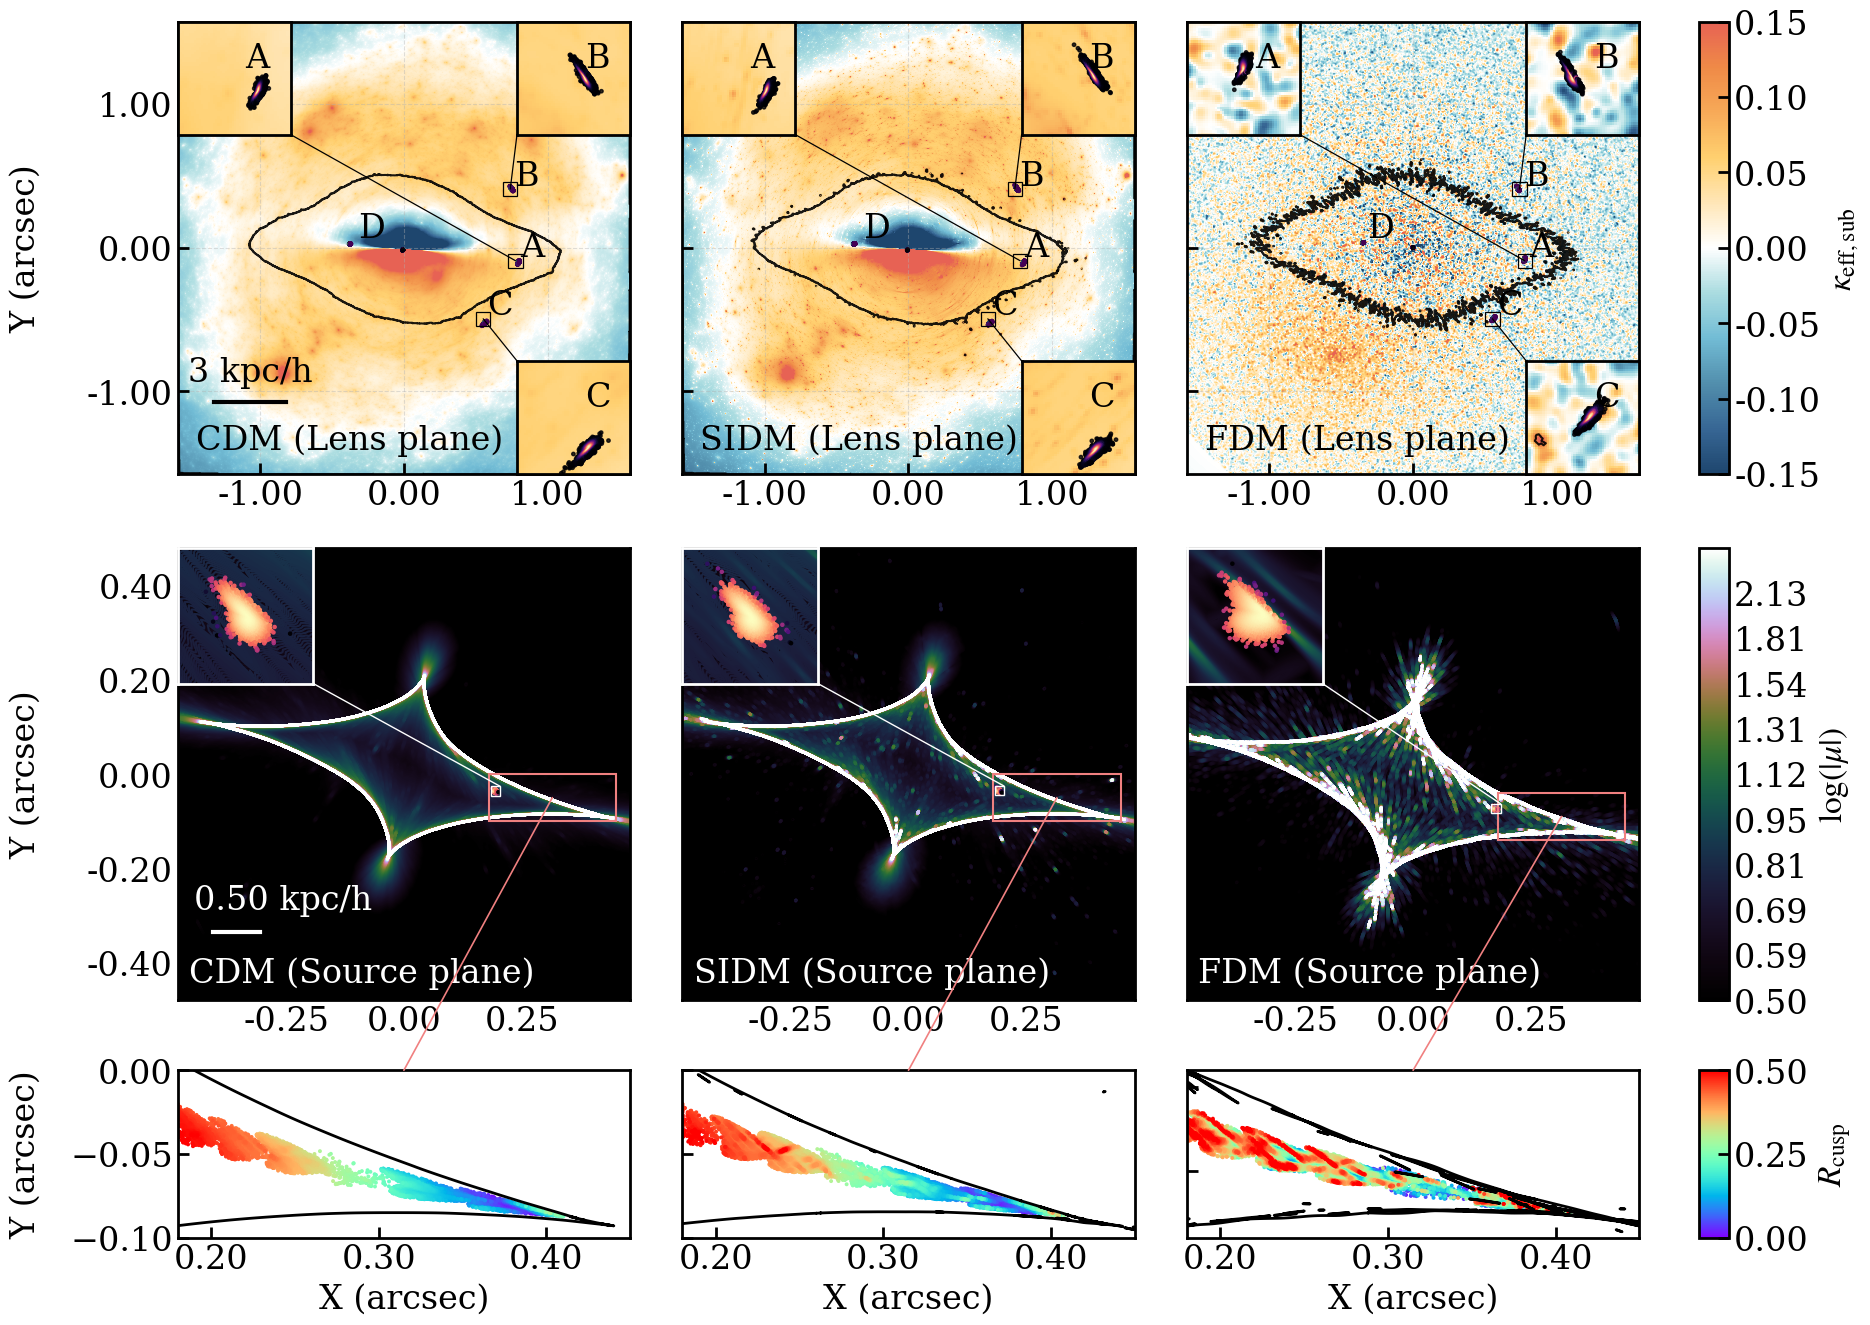

In [17]:
Get_All_Maps_3rows(
    analyzer,
    idx_use=184,
    vscale=0.15,
    focus_regions={
        "CDM":  (0.18, 0.45, -0.1,  0.0),
        "SIDM": (0.18, 0.45, -0.1,  0.0),
        "FDM":  (0.18, 0.45, -0.14, -0.04),
    }
)

## Plot

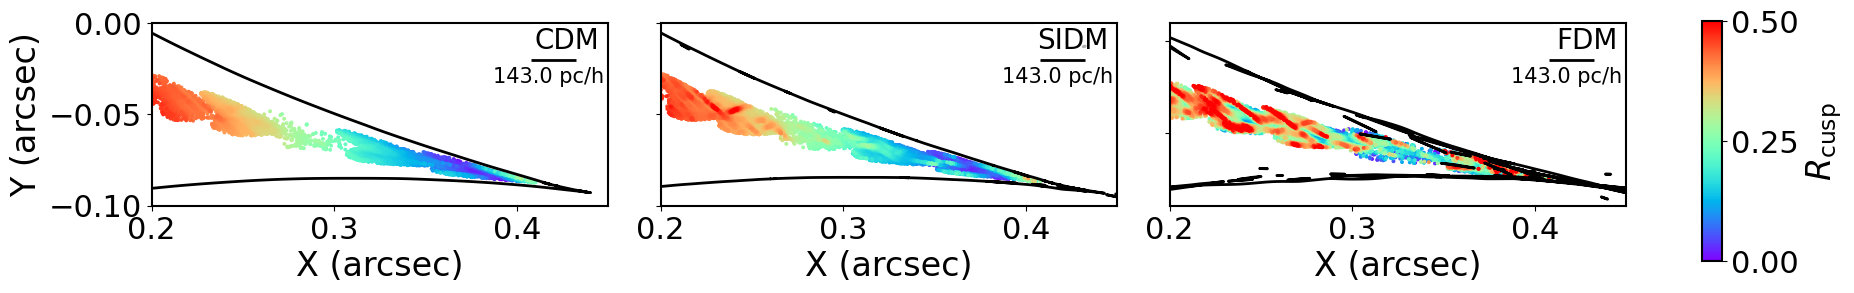

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def Get_Caustic_Map_list_focus_with_scatter(analyzer, idx_use, focus_regions=None):
    sim_types = ["CDM", "SIDM", "FDM"]
    fig = plt.figure(figsize=(20, 6))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1.0, 1.0, 1.0, 0.05], wspace=0.15)
    def get_region(i, sim_type):
        if focus_regions is None:
            return None
        if isinstance(focus_regions, dict):
            return focus_regions.get(sim_type, None)
        if isinstance(focus_regions, (list, tuple)) and len(focus_regions) > i:
            return focus_regions[i]
        return None
    sc = None
    for i, sim_type in enumerate(sim_types):
        filename = f"posterior_sourceplane_{sim_type}.npz"
        save_path = os.path.join(analyzer.savefile, filename)
        if not os.path.exists(save_path):
            print(f"Warning Posterior data not found: {save_path}")
            continue
        # ======== Load posterior data ========
        posterior = np.load(save_path, allow_pickle=True)
        x_src = posterior["x_src"]
        y_src = posterior["y_src"]
        Rcusp = posterior["Rcusp"]
        # ======== Load caustic data ========
        simu_obj = "all_sim_Mul"
        npz_path = os.path.join(
            "Theory_Mock", simu_obj, str(idx_use), str(run_id),
            f"{simu_obj}_{sim_type}_{idx_use}_opt_result.npz"
        )
        if not os.path.exists(npz_path):
            print(f"Warning Caustic npz not found: {npz_path}")
            continue
        data = np.load(npz_path, allow_pickle=True)
        mu_global = data["mu_global"]
        yi1 = data["yi1"]
        yi2 = data["yi2"]
        ax = fig.add_subplot(gs[0, i])
        plot_caustic_focus(
            ax, yi2, yi1, mu_global,
            None, None,
            analyzer.arcsec_1,
            ifscale=True,
            text=sim_type,
            focus_region=get_region(i, sim_type)
        )
        # =====================================================
        # =====================================================
        order = np.argsort(Rcusp)
        x_src = x_src[order]
        y_src = y_src[order]
        Rcusp = Rcusp[order]
        sc = ax.scatter(
            x_src, y_src,
            c=Rcusp,
            cmap='rainbow',
            vmin=0, vmax=0.5,
            s=8,
            edgecolors='none'
        )
        if i > 0:
            ax.set_yticklabels([])
            ax.set_ylabel("")
        ax.set_xlabel("X (arcsec)")
    cax = fig.add_axes([0.9, 0.25, 0.01, 0.40])  
    #                [left, bottom, width, height]
    cb = fig.colorbar(sc, cax=cax)
    cb.set_label(r"$R_{\rm cusp}$")
    cb.set_ticks([0.0, 0.25, 0.5])
    plt.show()


In [ ]:
Get_Caustic_Map_list_focus_with_scatter(
    analyzer,
    idx_use=184,
    focus_regions={
        "CDM":  (0.2, 0.45, -0.1, 0.0),
        "SIDM": (0.2, 0.45, -0.1, -0.0),
        "FDM":  (0.2, 0.45, -0.14, -0.04),
    }
)

# SIDM collapse for this system

## Direct plot of rhos and rs

[INFO] use_ratio = False
[INFO] N total: 121699  | N valid(log): 121699
[INFO] random sampled 10000 points


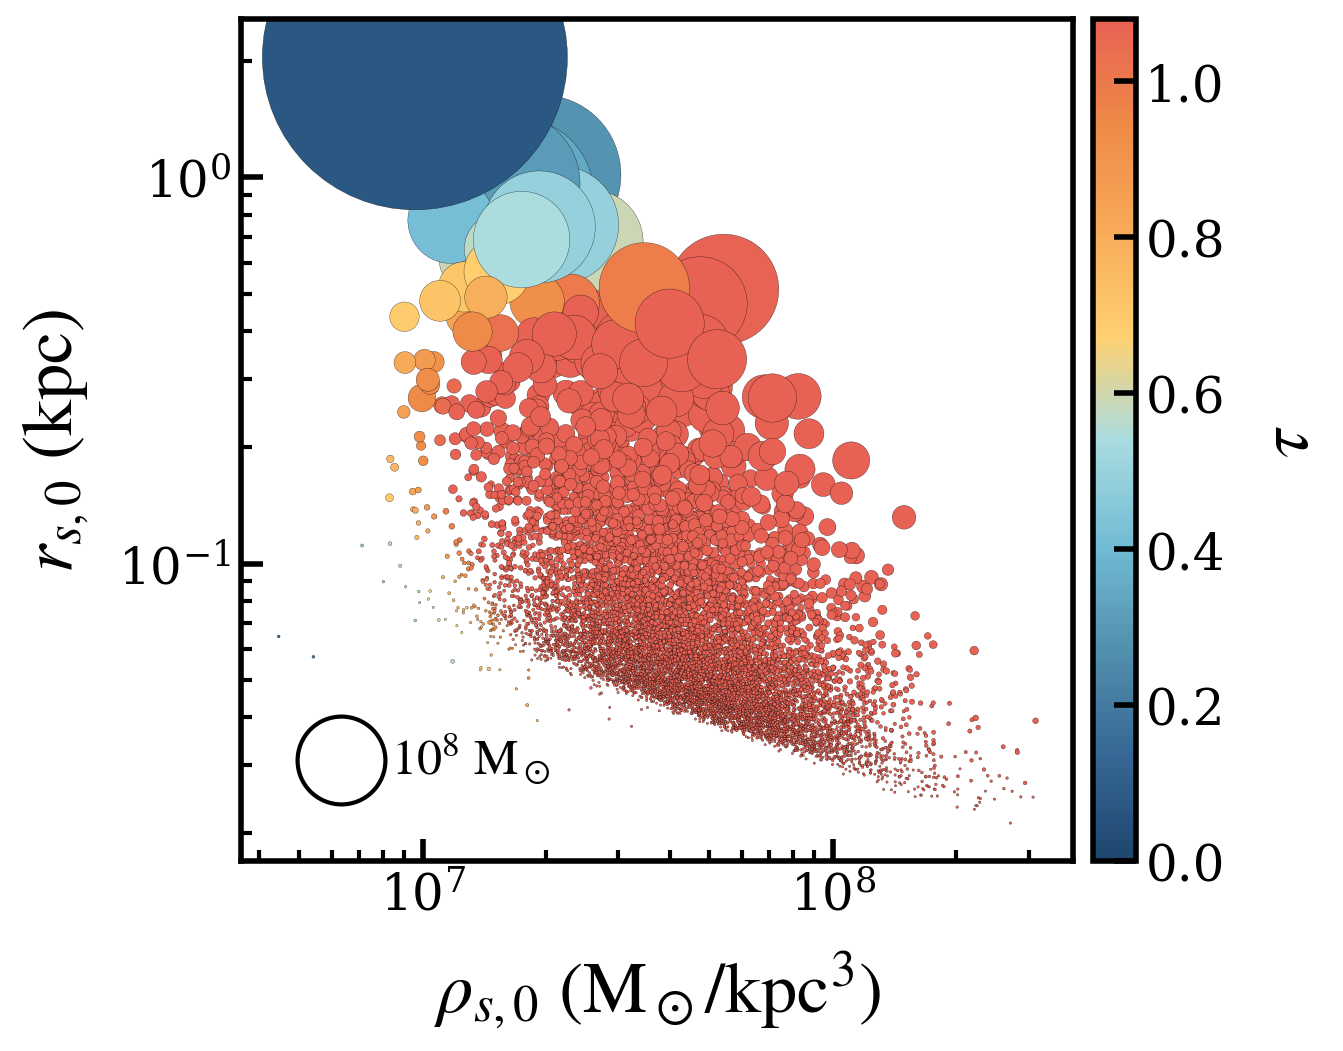

In [89]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
# =========================
# Plot (style like the example)
# =========================
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "stix",
    "font.size": 18,
    "axes.linewidth": 2.0,
    "axes.labelsize": 26,
    "axes.labelpad": 10,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 8,
    "ytick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.minor.size": 4,
    "xtick.major.width": 2.0,
    "ytick.major.width": 2.0,
    "xtick.minor.width": 1.5,
    "ytick.minor.width": 1.5,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "axes.titlesize": 18,
    "legend.fontsize": 16,
})
plt.rcParams["text.usetex"] = False
# =========================
# =========================
pkl_path = os.path.join(iteration_folder, f"{analyzer.name}_halolist_sigma0_8000_w0_6.pkl")
# =========================
# =========================
with open(pkl_path, "rb") as f:
    data = pickle.load(f)
# =========================
# =========================
rhos = np.array([h["tnfw_params"]["rhos"] for h in data], dtype=float)  # rho_{s,0}
rs   = np.array([h["tnfw_params"]["rs"]   for h in data], dtype=float)  # r_{s,0} (kpc)
tau  = np.array([h.get("tau", np.nan)     for h in data], dtype=float)
Mvir = np.array([h.get("mass", np.nan)    for h in data], dtype=float)
# =========================
# =========================
rhoH_keys = ["rhoH", "rho_H", "rho_h", "rho_core", "rho_c", "rho0", "rho_0"]
rH_keys   = ["rH", "r_H", "r_h", "r_core", "r_c", "r0", "r_0"]
def find_first_key(d, keys):
    for k in keys:
        if k in d:
            return k
    return None
rhoH_key = find_first_key(data[0], rhoH_keys)
rH_key   = find_first_key(data[0], rH_keys)
use_ratio = (rhoH_key is not None) and (rH_key is not None)
if use_ratio:
    rhoH = np.array([h[rhoH_key] for h in data], dtype=float)
    rH   = np.array([h[rH_key]   for h in data], dtype=float)
    x = rhoH / rhos
    y = rH / rs
    xlabel = r"$\rho_H / \rho_{s,0}$"
    ylabel = r"$r_H / r_{s,0}$"
else:
    x = rhos
    y = rs
    xlabel = r"$\rho_{s,0}\ \mathrm{(M_\odot/kpc^3)}$"
    ylabel = r"$r_{s,0}\ \mathrm{(kpc)}$"
print(f"[INFO] use_ratio = {use_ratio}")
if use_ratio:
    print(f"[INFO] detected keys: rhoH_key='{rhoH_key}', rH_key='{rH_key}'")
# =========================
# =========================
sizes = (Mvir / 1e5) 
sorted_idx = np.argsort(sizes)[::-1]
x_sorted   = x[sorted_idx]
y_sorted   = y[sorted_idx]
tau_sorted = tau[sorted_idx]
s_sorted   = sizes[sorted_idx]
# =========================
# =========================
mask = np.isfinite(x_sorted) & np.isfinite(y_sorted) & (x_sorted > 0) & (y_sorted > 0)
print("[INFO] N total:", len(x_sorted), " | N valid(log):", int(mask.sum()))
x_plot   = x_sorted[mask]
y_plot   = y_sorted[mask]
tau_plot = tau_sorted[mask]
s_plot   = s_sorted[mask]
s_plot = np.where(np.isfinite(s_plot) & (s_plot > 0), s_plot, 5.0)
# =========================
# =========================
N_sample = 10000
if len(x_plot) > N_sample:
    rng = np.random.default_rng(seed=1)
    idx = rng.choice(len(x_plot), size=N_sample, replace=False)
    x_plot   = x_plot[idx]
    y_plot   = y_plot[idx]
    tau_plot = tau_plot[idx]
    s_plot   = s_plot[idx]
    print(f"[INFO] random sampled {N_sample} points")
else:
    print(f"[INFO] use all points (N={len(x_plot)})")
# =========================
# =========================
fig, ax = plt.subplots(figsize=(7, 5.6), dpi=200)
try:
    cmap256
except NameError:
    cmap256 = "Spectral_r"
# =========================
# =========================
vmin, vmax = 0.0, 1.08
sc = plt.scatter(
    x_plot, y_plot,
    c=tau_plot,
    s=s_plot,
    cmap=cmap256_2.reversed(),
    vmin=vmin,
    vmax=vmax,
    alpha=1,
    edgecolors="k",
    linewidth=0.1,
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
# =========================
# =========================
cbar = plt.colorbar(sc, pad=0.02)
cbar.set_label(r"$\tau$")
cbar.ax.tick_params()
# =========================
# =========================
ax = plt.gca()
# ax.set_aspect("equal", adjustable="box")
# =========================
# =========================
circle_radius = (1e8 / 1e5)
legend_x, legend_y = 0.12, 0.12
ax.scatter(
    [legend_x], [legend_y],
    s=circle_radius,
    c="white",
    alpha=1,
    edgecolors="k",
    linewidth=1.5,
    transform=ax.transAxes,
    clip_on=False,
    zorder=10,
)
ax.text(
    legend_x + 0.06, legend_y-0.03 ,
    r"$10^{8}\ \mathrm{M_\odot}$",
    # fontsize=20,
    ha="left", va="bottom",
    transform=ax.transAxes,
    zorder=11,
)
plt.tight_layout()
plt.savefig("Tau_mass.pdf", bbox_inches="tight")
plt.show()

## Vmax,Rmax

[INFO] Subhalos only: N = 13730
[INFO] Using NFW transform: x=Vmax, y=Rmax
[INFO] N total: 13730  | N valid(log): 13730
[INFO] use all points (N=13730)


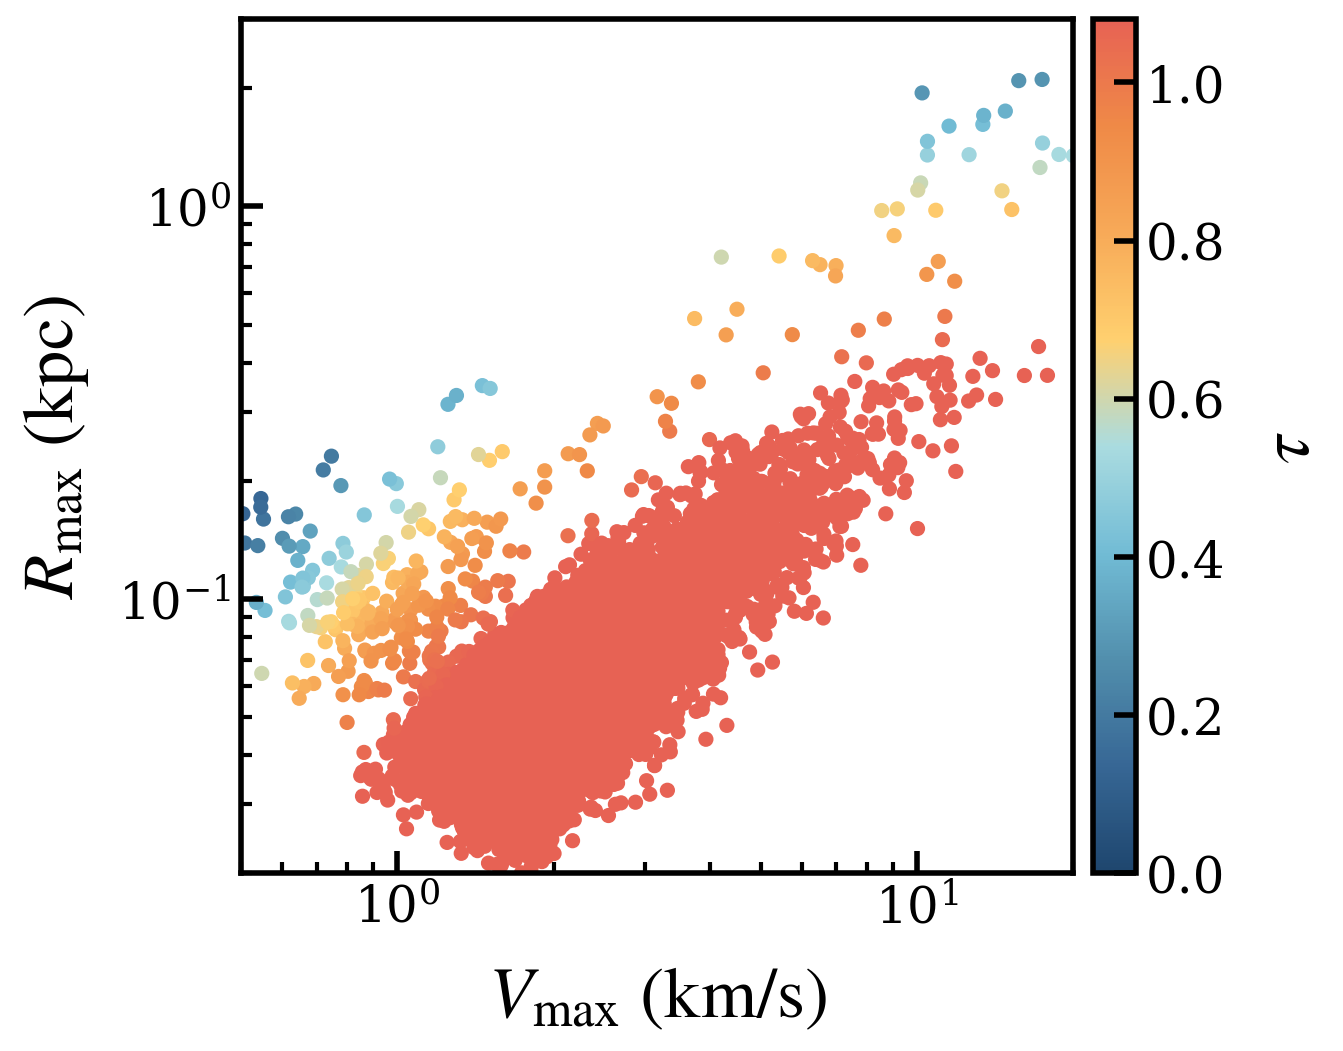

In [56]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from Sidm_tool import VmaxNFW, RmaxNFW,Vmax_ratio,Rmax_ratio
# =========================
# Plot (style like the example)
# =========================
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "stix",
    "font.size": 18,
    "axes.linewidth": 2.0,
    "axes.labelsize": 26,
    "axes.labelpad": 10,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 8,
    "ytick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.minor.size": 4,
    "xtick.major.width": 2.0,
    "ytick.major.width": 2.0,
    "xtick.minor.width": 1.5,
    "ytick.minor.width": 1.5,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "axes.titlesize": 18,
    "legend.fontsize": 16,
})
plt.rcParams["text.usetex"] = False
# =========================
# =========================
pkl_path = os.path.join(iteration_folder, f"{analyzer.name}_halolist_sigma0_8000_w0_6.pkl")
# =========================
# =========================
with open(pkl_path, "rb") as f:
    data = pickle.load(f)
# =========================
# =========================
data = [h for h in data if h.get("isSubhalo", False)]
print(f"[INFO] Subhalos only: N = {len(data)}")
# =========================
# =========================
rhos = np.array([h["tnfw_params"]["rhos"] for h in data], dtype=float)  # rho_{s,0}
rs   = np.array([h["tnfw_params"]["rs"]   for h in data], dtype=float)  # r_{s,0} (kpc)
tau  = np.array([h.get("tau", np.nan)     for h in data], dtype=float)
Mvir = np.array([h.get("mass", np.nan)    for h in data], dtype=float)
# =========================
# =========================
Vmaxratio = Vmax_ratio(tau)
Rmaxratio = Rmax_ratio(tau)
x = VmaxNFW(rhos, rs)*Vmaxratio   # km/s
y = RmaxNFW(rs)*Rmaxratio         # kpc
xlabel = r"$V_{\max}\ \mathrm{(km/s)}$"
ylabel = r"$R_{\max}\ \mathrm{(kpc)}$"
print("[INFO] Using NFW transform: x=Vmax, y=Rmax")
# =========================
# =========================
sizes = (Mvir / 1e5) 
sorted_idx = np.argsort(sizes)[::-1]
x_sorted   = x[sorted_idx]
y_sorted   = y[sorted_idx]
tau_sorted = tau[sorted_idx]
s_sorted   = sizes[sorted_idx]
# =========================
# =========================
mask = np.isfinite(x_sorted) & np.isfinite(y_sorted) & (x_sorted > 0) & (y_sorted > 0)
print("[INFO] N total:", len(x_sorted), " | N valid(log):", int(mask.sum()))
x_plot   = x_sorted[mask]
y_plot   = y_sorted[mask]
tau_plot = tau_sorted[mask]
s_plot   = s_sorted[mask]
s_plot = np.where(np.isfinite(s_plot) & (s_plot > 0), s_plot, 5.0)
# =========================
# =========================
N_sample = 20000
if len(x_plot) > N_sample:
    rng = np.random.default_rng(seed=1)
    idx = rng.choice(len(x_plot), size=N_sample, replace=False)
    x_plot   = x_plot[idx]
    y_plot   = y_plot[idx]
    tau_plot = tau_plot[idx]
    s_plot   = s_plot[idx]
    print(f"[INFO] random sampled {N_sample} points")
else:
    print(f"[INFO] use all points (N={len(x_plot)})")
# =========================
# =========================
fig, ax = plt.subplots(figsize=(7, 5.6), dpi=200)
try:
    cmap256
except NameError:
    cmap256 = "Spectral_r"
# =========================
# =========================
vmin, vmax = 0.0, 1.08
sc = plt.scatter(
    x_plot, y_plot,
    c=tau_plot,
    # s=s_plot,
    s=20,
    cmap=cmap256_2.reversed(),
    vmin=vmin,
    vmax=vmax,
    alpha=1,
    # edgecolors="k",
    # linewidth=0.1,
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
# =========================
# =========================
cbar = plt.colorbar(sc, pad=0.02)
cbar.set_label(r"$\tau$")
cbar.ax.tick_params()
# =========================
# =========================
ax = plt.gca()
# =========================
# =========================
ax.set_xlim(0.5, 20)     # Vmax: km/s
ax.set_ylim(0.02, 3)   # Rmax: kpc
# ax.set_aspect("equal", adjustable="box")
# # =========================
# =========================
circle_radius = (1e8 / 1e5)
# legend_x, legend_y = 0.12, 0.88
# ax.scatter(
#     [legend_x], [legend_y],
#     s=circle_radius,
#     c="white",
#     alpha=1,
#     edgecolors="k",
#     linewidth=1.5,
#     clip_on=False,
#     zorder=10,
# )
# ax.text(
#     legend_x + 0.06, legend_y+0.03 ,
#     r"$10^{8}\ \mathrm{M_\odot}$",
#     # fontsize=20,
#     ha="left", va="top",
#     zorder=11,
# )
plt.tight_layout()
plt.savefig("Tau_mass.pdf", bbox_inches="tight")
plt.show()